# Lyrics Genius Predict

![Lyrics Genius Logo](assets/LyricsGenius.png)

Use this notebook if you already have a trained model from an artist and want to generate lyrics for a song.

# Imports

In [78]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, Embedding, InputLayer
from keras.layers import LSTM, Lambda
from keras.utils.vis_utils import plot_model
import keras
from keras.layers.merge import add
import pydot
import numpy as np
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences
import sys
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import io
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

# Defining the Character Encoding Used

In [79]:
alphabet_path = "models/gongora-alphabet.json"
tokenizer_path = "models/gongora-tokenizer.pkl"
Tx = 40

In [80]:
tk = None
alphabet = None

# Load alphabet
with open(alphabet_path, 'r') as fp:
    alphabet = json.load(fp)
    
# Load tokenizer
with open(tokenizer_path, 'rb') as fp:
    tk = pickle.load(fp)


# construct a new vocabulary
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1


In [81]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    out = np.random.choice(range(len(chars)), p = probas.ravel())
    return out

# Loading the Model

In [82]:
model_path = "models/gongora_model_res.h5"
model = load_model(model_path)

In [83]:
from keras.utils.vis_utils import plot_model

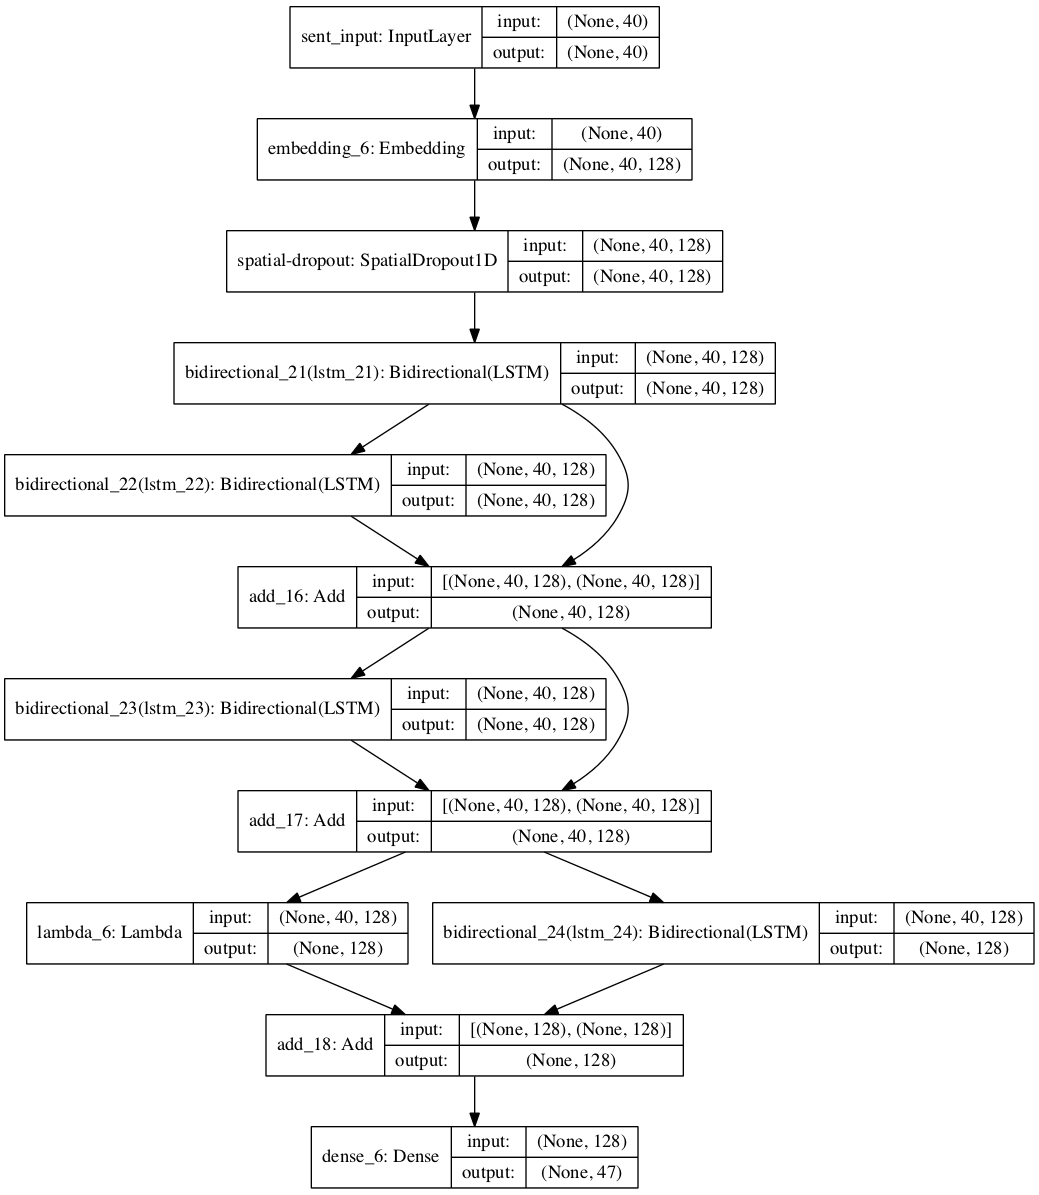

In [84]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [74]:
def generate_output(prediction_length=400, static=False, lyrics_input=None, temperature=0.1):
    usr_input=lyrics_input
    generated = ''
    if not static:
        usr_input = input("Start typing the beginning of your lyrics. Lyric-genius will complete it.\n Your input is: ")
    # zero pad the sentence to Tx characters.
    sentence = ('{0:0>' + str(Tx) + '}').format(usr_input).lower()
    generated += usr_input 

    sys.stdout.write("\n\nGenerated Lyrics: \n\n") 
    sys.stdout.write(usr_input)
    for i in range(prediction_length):
        predict_sequence = tk.texts_to_sequences([sentence])
  
        # Padding
        predict_data = pad_sequences(predict_sequence, maxlen=Tx, padding='post')

        # Convert to numpy array
        x_pred = np.array(predict_data, dtype='float32')

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature = temperature)
        next_char = alphabet[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()

        if next_char == '\n':
            continue

# Create Lyrics

## Dynamic Generator

In [76]:
# Tx is the length of the input
generate_output(prediction_length=300, temperature=0.3)

Start typing the beginning of your lyrics. Lyric-genius will complete it.
 Your input is: I know


Generated Lyrics: 

I know

i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i know i kn

## Static Generator

In [77]:
lyrics_input = "All around the world "

import warnings
warnings.filterwarnings('ignore')


generate_output(prediction_length=300, static=True, lyrics_input=lyrics_input, temperature =0.3)



Generated Lyrics: 

All around the world boy boy be be be a baby, baby, baby, make my mind a man a man
take me a face of a spiliur the face

the sun the brother something and the sun


i know i know i know i know i know i know i know i know i don't know i know i know i know i know i know i know i know i know i know i know

i know i know i 